In [3]:
# Jupyter Notebook Chapter 7 and 8 Exercises Program
# DSC 530
# Week 7
# EDA Assignment Week 7
# David Berberena
# 1/28/2024

# Program Start

# Exercise 7-1

# Code taken from the Exercise file to establish the correct dataset manipulation environment

from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

import numpy as np


import thinkstats2
import thinkplot

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

import first

live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

Downloaded nsfg.py
Downloaded first.py
Downloaded 2002FemPreg.dct
Downloaded 2002FemPreg.dat.gz


In [ ]:
# Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. 
# Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. 
# How would you characterize the relationship between these variables?

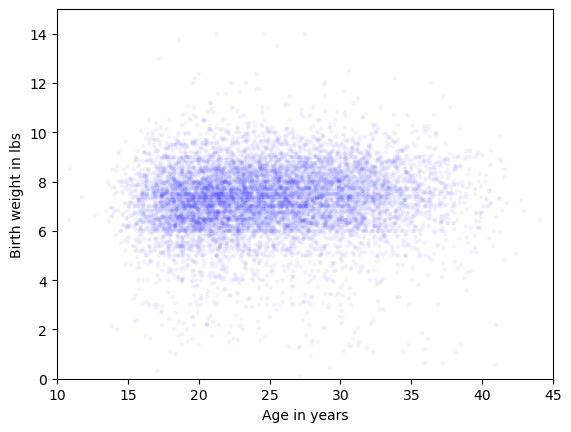

In [4]:
# Age and weight variables must be established by extracting these values from the dataset

age = live.agepreg
weight = live.totalwgt_lb

# Scatter plot generation comparing mother's age with birth weight can be accomplished using the thinkplot library's 
# Scatter() function as well as the Config() function to adjust the parameters of the plot

thinkplot.Scatter(age, weight, alpha=0.05, s=10)
thinkplot.Config(xlabel='Age in years',
                     ylabel='Birth weight in lbs',
                     xlim=[10, 45],
                     ylim=[0, 15],
                     legend=False)

In [6]:
# In this scatter plot, the data points are spread out everywhere on the plot with no clear direction as to where the data 
# slopes. This means that the realtionship between the mother's age and the birth weight is weak with no linear direction.

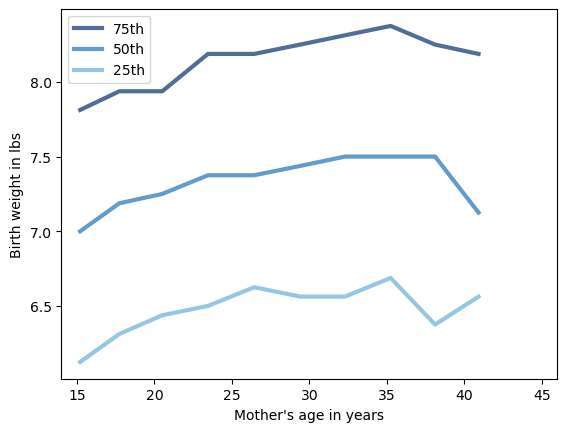

In [30]:
# Plotting of percentiles of birth weight versus mother's age

# First we must establish the bins (x-axis values) as the mother's age using both np.arange() and np.digitize()
# We then will group the data by the newly created indices

# The bins named are those ages that most healthy live births take place between, and the step value shows the data with
# enough visible data points that the plot will not be too broad or cluttered with observations

bins = np.arange(10, 48, 3)
indices = np.digitize(age, bins)
groups = live.groupby(indices)

# Now we need to create data points on the plot that reflect the average birth weight for each year of a mother's age
# This is done with taking the mean of the mother's age group and the CDF of the birth weight group 

mother_ages = [group.agepreg.mean() for i, group in groups][1:-1]
weight_cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

# The thinkplot.Preplot() function allows us to place more than one plot on the same plane to compare the plots easier
# For loop is created to generate plots only for the 25th, 50th, and 75th percentiles and pulls the percentiles from the 
# weight_cdfs variable created previously while the labels variable is made to attach readable names to the plots
# thinkplot.Plot() takes in all our variables as arguments to plot the weight percentiles compared to the mother's age

thinkplot.PrePlot(3)
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in weight_cdfs]
    label = '%dth' % percent
    thinkplot.Plot(mother_ages, weights, label=label)
        
# thinkplot.Config() allows the naming of the x and y-axis, the numerical scale of the x-axis, and the creation of a legend

thinkplot.Config(xlabel="Mother's age in years",
                ylabel="Birth weight in lbs",
                xlim=[14, 46], legend=True)

In [ ]:
# Looking at the percentile plots, the relationship between the mother's age and birth weight is non-linear, as the plots do
# not travel together in a straight line. While the plots can be generalized as moving in the same direction, they still are
# seen as non-linear since there are notable fluctuations in the plots' data points.

In [35]:
# Pearson and Spearman correlation computation

# I will be using scipy.stats to calculate both coefficients as scipy.stats has functions to compute both of these values

import scipy
from scipy import stats

# Pearson

pearson_value = scipy.stats.pearsonr(age, weight).statistic

# Spearman

spearman_value = scipy.stats.spearmanr(age, weight).statistic

# Printing of coefficients defining correlation between mother's age and birth weight

print(f'Pearson Coefficient: {pearson_value}')
print(f'Spearman Coefficient: {spearman_value}')

Pearson Coefficient: 0.06883397035410907
Spearman Coefficient: 0.09461004109658226


In [36]:
# Seeing how close each coefficient value is to zero shows that the correlation between these two variables is very weak, to
# the point where there is almost no correlation at all.

In [57]:
# Exercise 8-1

# In this chapter we used $\xbar$ and median to estimate $\mu$, and found that $\xbar$  yields lower MSE. 
# Also, we used $S^2$ and $S_{n-1}^2$ to estimate $\sigma$, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
# Run similar experiments to see if $\xbar$ and median are biased estimates of $\mu$. 
# Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

# Code taken from Exercise file to establish correct coding environment

def RMSE(estimates, actual):
    
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

def MeanError(estimates, actual):

    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

import random

# Exercise function to establish first experiment

def Estimate1(n=7, iters=1000):

    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))

# Creation of function that creates a new experiment to see if xbar and median are biased estimates
# This function almost mirrors the Exercise function save for the switching of the RSME function for MeanError 

def Bias_Checker(n=7, iters=100000):

    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 2')
    print('Xbar mean error', MeanError(means, mu))
    print('Median mean error', MeanError(medians, mu))
    
# Call both functions for proper output
    
Estimate1()
    
Bias_Checker()

Experiment 1
rmse xbar 0.3832173601040973
rmse median 0.45281887260344
Experiment 2
Xbar mean error 0.0015943358421883047
Median mean error 0.0020872432104612785


In [ ]:
# Looking at the mean error for both xbar and median, we can see that neither estimate is biased as both mean errors are
# extremely close to zero and continue to compute closer to zero as the number of iterations increases.

In [58]:
# Checking of lower variance MSE

# Exercise function to establish first experiment

def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)
    print('Experiment 1')
    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))
    
# Creation of function that creates a new experiment to see if the RSME of the biased or unbiased estimator is lower
# This function almost mirrors the Exercise function save for the switching of the MeanError function for RSME

def RSME_Checker(n=7, iters=100000):

    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Experiment 2')
    print('RMSE biased', RMSE(estimates1, sigma**2))
    print('RMSE unbiased', RMSE(estimates2, sigma**2))
    
# Call both functions for proper output
    
Estimate2()

RSME_Checker()

Experiment 1
mean error biased -0.13476873551737123
mean error unbiased 0.009436475229733557
Experiment 2
RMSE biased 0.5142955534135406
RMSE unbiased 0.5760060358000472


In [ ]:
# Observing the RMSE output, the biased variance estimator is lower than the unbiased estimator. The difference is about
# eleven percent, which is also roughly the same percentage of difference as the number of iterations increases as well.

Standard Error: 0.8644435907152892
90% Confidence Interval (1.2617020731955384, 3.753443714314608)


0.8644435907152892

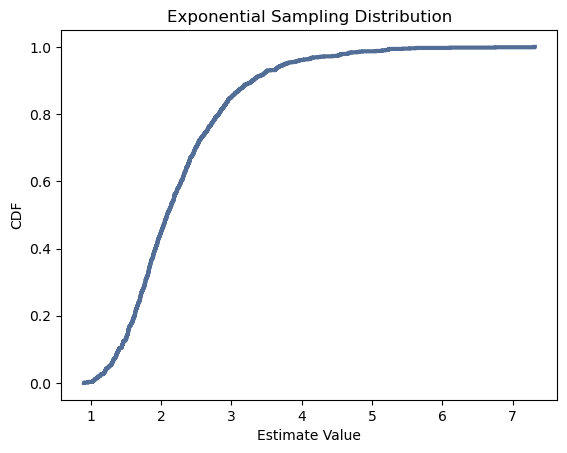

In [61]:
# Exercise 8-2

# Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times 
# and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence 
# interval. Repeat the experiment with a few different values of n and make a plot of standard error versus n.

# Code taken from Exercise file and modified to fit the parameters of the assignment

def Exponential_dist(n=10, iters=1000):
    lam = 2

# Estimate is created in the for loop below

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        estimates.append(L)
        
# Standard error is computed using the previously defined RMSE() function
        
    stderr = RMSE(estimates, lam)
    print('Standard Error:', stderr)

# The CDF of the estimates is gleaned for it to be plotted below
# The confidence interval is pulled from the CDF at the 5th and 95th percentile (90% confidence)
    
    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('90% Confidence Interval', ci)
    
# the thinkplot.Cdf() function in the thinkplot library is used to plot the estimate
    
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='Estimate Value',
                     ylabel='CDF',
                     title='Exponential Sampling Distribution')

    return stderr
        
# Call the function to see the first sampling distribution

Exponential_dist()

In [65]:
# Final plot of iterations versus standard error

# Define a new function that does the same thing as the first function yet only displays standard error

def Exponential_dist_multiple(n=10, iters=1000):
    lam = 2

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        estimates.append(L)
        
    stderr = RMSE(estimates, lam)
    
    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)

    return stderr

# For loop that prints the number of iterations and standard errors for each experiment

for n in [10, 100, 1000, 10000, 100000]:
        stderr = Exponential_dist_multiple(n=n)
        print((n, stderr))

(10, 0.8188730719061429)
(100, 0.20720482039728869)
(1000, 0.06259172421543482)
(10000, 0.01928296762154096)
(100000, 0.006494642756811644)
